In [45]:
from PID_MAIN import *

In [46]:
import pandas as pd

In [47]:
input_data_path = 'data/pi/0122IslandQControl.csv'
pid = PID(path=input_data_path)
# pid.build()

In [48]:
data = pid.input_data
data

,DeltaQ,Iqref,Iq,DeltaIq,DeltaUq
Time,,,,,
0.00000,-0.000143,-0.021431,-0.021464,0.000032,0.014657
0.00005,-0.000152,-0.021431,-0.021475,0.000044,0.014657
0.00010,-0.000161,-0.021431,-0.021486,0.000055,0.014658
0.00015,-0.000169,-0.021431,-0.021497,0.000067,0.014658
0.00020,-0.000178,-0.021430,-0.021509,0.000078,0.014658
...,...,...,...,...,...
0.09975,-0.003551,-0.017704,-0.026744,0.009040,0.015658
0.09980,-0.003559,-0.017703,-0.026752,0.009049,0.015659
0.09985,-0.003567,-0.017702,-0.026759,0.009057,0.015659


In [49]:
time_step = data.index[1] - data.index[0]

In [50]:
I_t = (data.DeltaQ.to_numpy()[2:] - data.DeltaQ.to_numpy()[:-2]) / (2 * time_step)

In [51]:
O_t = (data.Iqref.to_numpy()[2:] - data.Iqref.to_numpy()[:-2]) / (2 * time_step)

<Axes: >

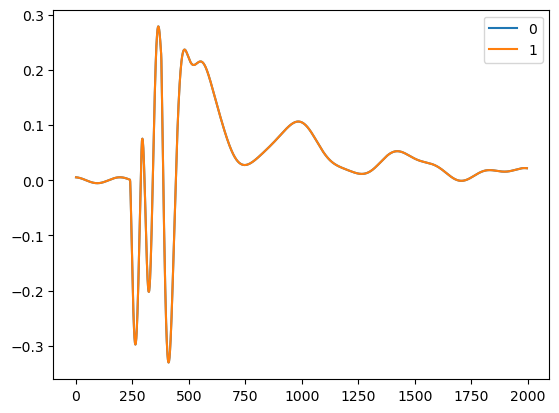

In [52]:
pd.DataFrame([I_t*(-0.025)+data.DeltaQ.to_numpy()[1:-1]*(-5), O_t]).T.plot()

In [53]:
I_t = (data.DeltaIq.to_numpy()[2:] - data.DeltaIq.to_numpy()[:-2]) / (2 * time_step)

In [10]:
O_t = (data.DeltaUq.to_numpy()[2:] - data.DeltaUq.to_numpy()[:-2]) / (2 * time_step)

Axes(0.125,0.11;0.775x0.77)


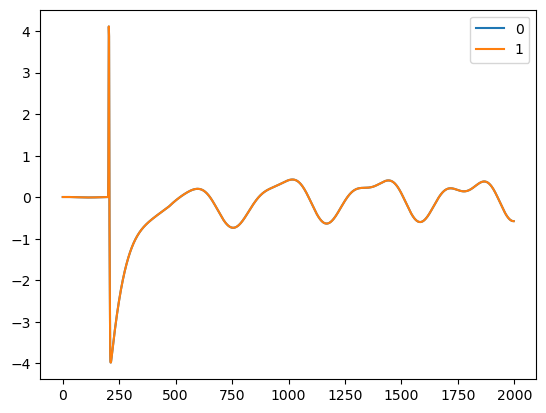

In [11]:
print(pd.DataFrame([I_t*(0.025)+data.DeltaIq.to_numpy()[1:-1]*(.5), O_t]).T.plot())

In [12]:
def data_plot(data, I, O, kp, ki):
    I_t = (data[I].to_numpy()[2:] - data[I].to_numpy()[:-2]) / (2 * time_step)
    O_t = (data[O].to_numpy()[2:] - data[O].to_numpy()[:-2]) / (2 * time_step)
    print(pd.DataFrame([I_t*kp+data[I].to_numpy()[1:-1]*ki, O_t]).T.plot())

In [13]:
data_path = 'data/pi/0122OngridDControl.csv'

In [14]:
data = pd.read_csv(data_path)

In [15]:
data

,Time,Subsystem #1|CTLs|Vars|Isderr8,Subsystem #1|CTLs|Vars|Isdrefongrid8,Subsystem #1|CTLs|Vars|PrefPV,Subsystem #1|CTLs|Vars|VDCerr,Subsystem #1|CTLs|Vars|udA8
0,0.00000,0.000195,0.681867,0.317343,0.000069,-0.000092
1,0.00005,0.000202,0.681869,0.317344,0.000071,-0.000091
2,0.00010,0.000208,0.681871,0.317345,0.000072,-0.000091
3,0.00015,0.000215,0.681872,0.317345,0.000073,-0.000091
4,0.00020,0.000221,0.681874,0.317346,0.000074,-0.000091
...,...,...,...,...,...,...
1995,0.09975,-0.000307,0.680261,0.316595,-0.001299,-0.000102
1996,0.09980,-0.000299,0.680263,0.316596,-0.001296,-0.000102
1997,0.09985,-0.000291,0.680265,0.316597,-0.001294,-0.000102
1998,0.09990,-0.000283,0.680267,0.316598,-0.001291,-0.000102


Axes(0.125,0.11;0.775x0.77)


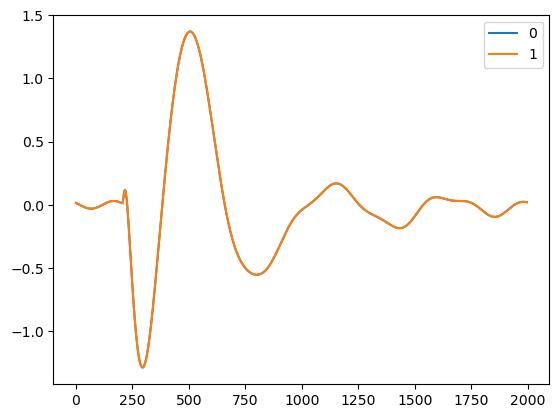

In [16]:
data_plot(data, 'Subsystem #1|CTLs|Vars|VDCerr', 'Subsystem #1|CTLs|Vars|PrefPV', 0.6,5.99)

Axes(0.125,0.11;0.775x0.77)


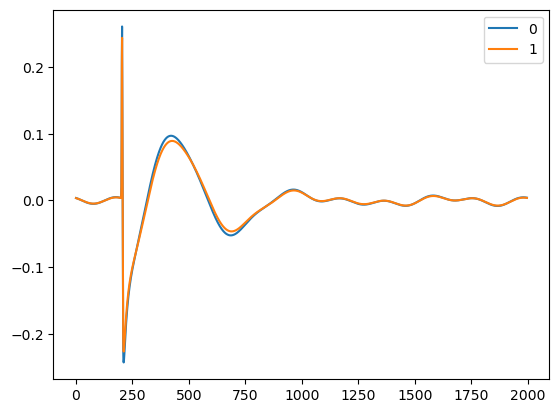

In [17]:
data_plot(data, 'Subsystem #1|CTLs|Vars|Isderr8', 'Subsystem #1|CTLs|Vars|udA8', 0.0268, 0.16)

In [18]:
pid.input_data

,DeltaQ,Iqref,Iq,DeltaIq,DeltaUq
Time,,,,,
0.00000,0.000045,-0.021436,-0.021258,-0.000179,0.014652
0.00005,0.000035,-0.021436,-0.021268,-0.000168,0.014652
0.00010,0.000025,-0.021436,-0.021278,-0.000158,0.014652
0.00015,0.000014,-0.021436,-0.021288,-0.000148,0.014653
0.00020,0.000004,-0.021435,-0.021298,-0.000137,0.014653
...,...,...,...,...,...
0.09975,0.047324,-0.033827,0.108044,-0.141872,-0.004037
0.09980,0.047709,-0.033849,0.109032,-0.142880,-0.004066
0.09985,0.048081,-0.033870,0.110019,-0.143889,-0.004094


In [19]:
time_step = pid.input_data.index[1] - pid.input_data.index[0]
time_step

5e-05

In [20]:
k_p1 = 0.199
k_i1 = -0.0125
k_p2 = 0.0232
k_i2 = 0.498
# k_p1 = 0.025
# k_i1 = 5
# k_p2 = 0.025
# k_i2 = 0.5

In [21]:
I_t = (pid.input_data['DeltaQ'].to_numpy()[2:] - pid.input_data['DeltaQ'].to_numpy()[:-2]) / (2 * time_step)

In [22]:
O_t = I_t*k_p1+pid.input_data['DeltaQ'].to_numpy()[1:-1]*k_i1

In [23]:
O_0 = pid.input_data['Iqref'][0]
O_0

-0.0214362561

In [24]:
O_list = []
O_list.append(O_0)
for _ in range(O_t.shape[0]):
    O_list.append(O_list[-1]+time_step*O_t[_])

In [25]:
I2 = O_list[1:] - pid.input_data['Iq'].to_numpy()[1:-1]

In [26]:
I2_t = (I2[2:] - I2[:-2]) / (2 * time_step)

In [27]:
O_t = (pid.input_data['DeltaUq'].to_numpy()[2:] - pid.input_data['DeltaUq'].to_numpy()[:-2]) / (2 * time_step)

In [34]:
O_t

array([ 0.0050697 ,  0.0051558 ,  0.0052366 , ..., -0.57567271,
       -0.57585304, -0.57573194])

Axes(0.125,0.11;0.775x0.77)


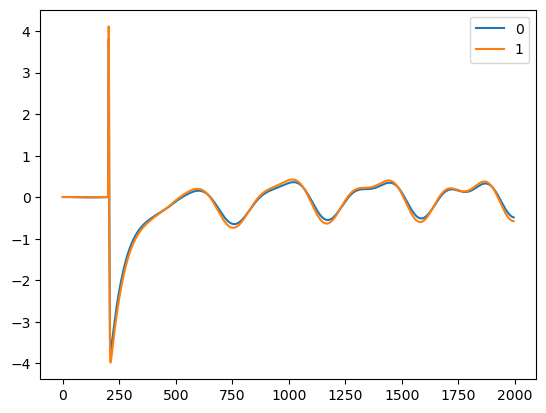

In [31]:
print(pd.DataFrame([I2_t*k_p2+I2[1:-1]*k_i2, O_t[1:-1]]).T.plot())

(-1.0, 0.0)

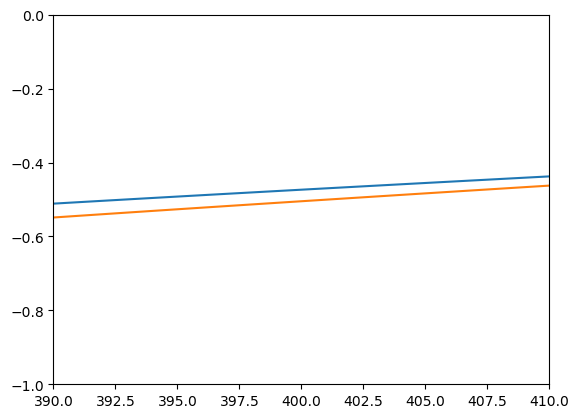

In [44]:
plt.figure()
plt.plot([_ for _ in range(len(O_t[1:-1]))], I2_t*k_p2+I2[1:-1]*k_i2)
plt.plot([_ for _ in range(len(O_t[1:-1]))], O_t[1:-1])
plt.xlim((390,410))
plt.ylim((-1,0))

In [37]:
O_t[1:-1].shape

(1996,)